In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%ls /gdrive
file1 = 'My Drive/Colab Notebooks/winequality_white.csv'
file2 = 'My Drive/Colab Notebooks/winequality_red.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
'My Drive'/


In [0]:
# Import pandas 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Read in white wine data 
white = pd.read_csv(file1)

# Read in red wine data 
red = pd.read_csv(file2)

#"http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';'

In [3]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

In [0]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.876889
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.882610
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,8.000000


In [0]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
pd.isnull(red).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [0]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [0]:
import seaborn as sns

sns.pairplot(data=red, diag_kind = 'kde')



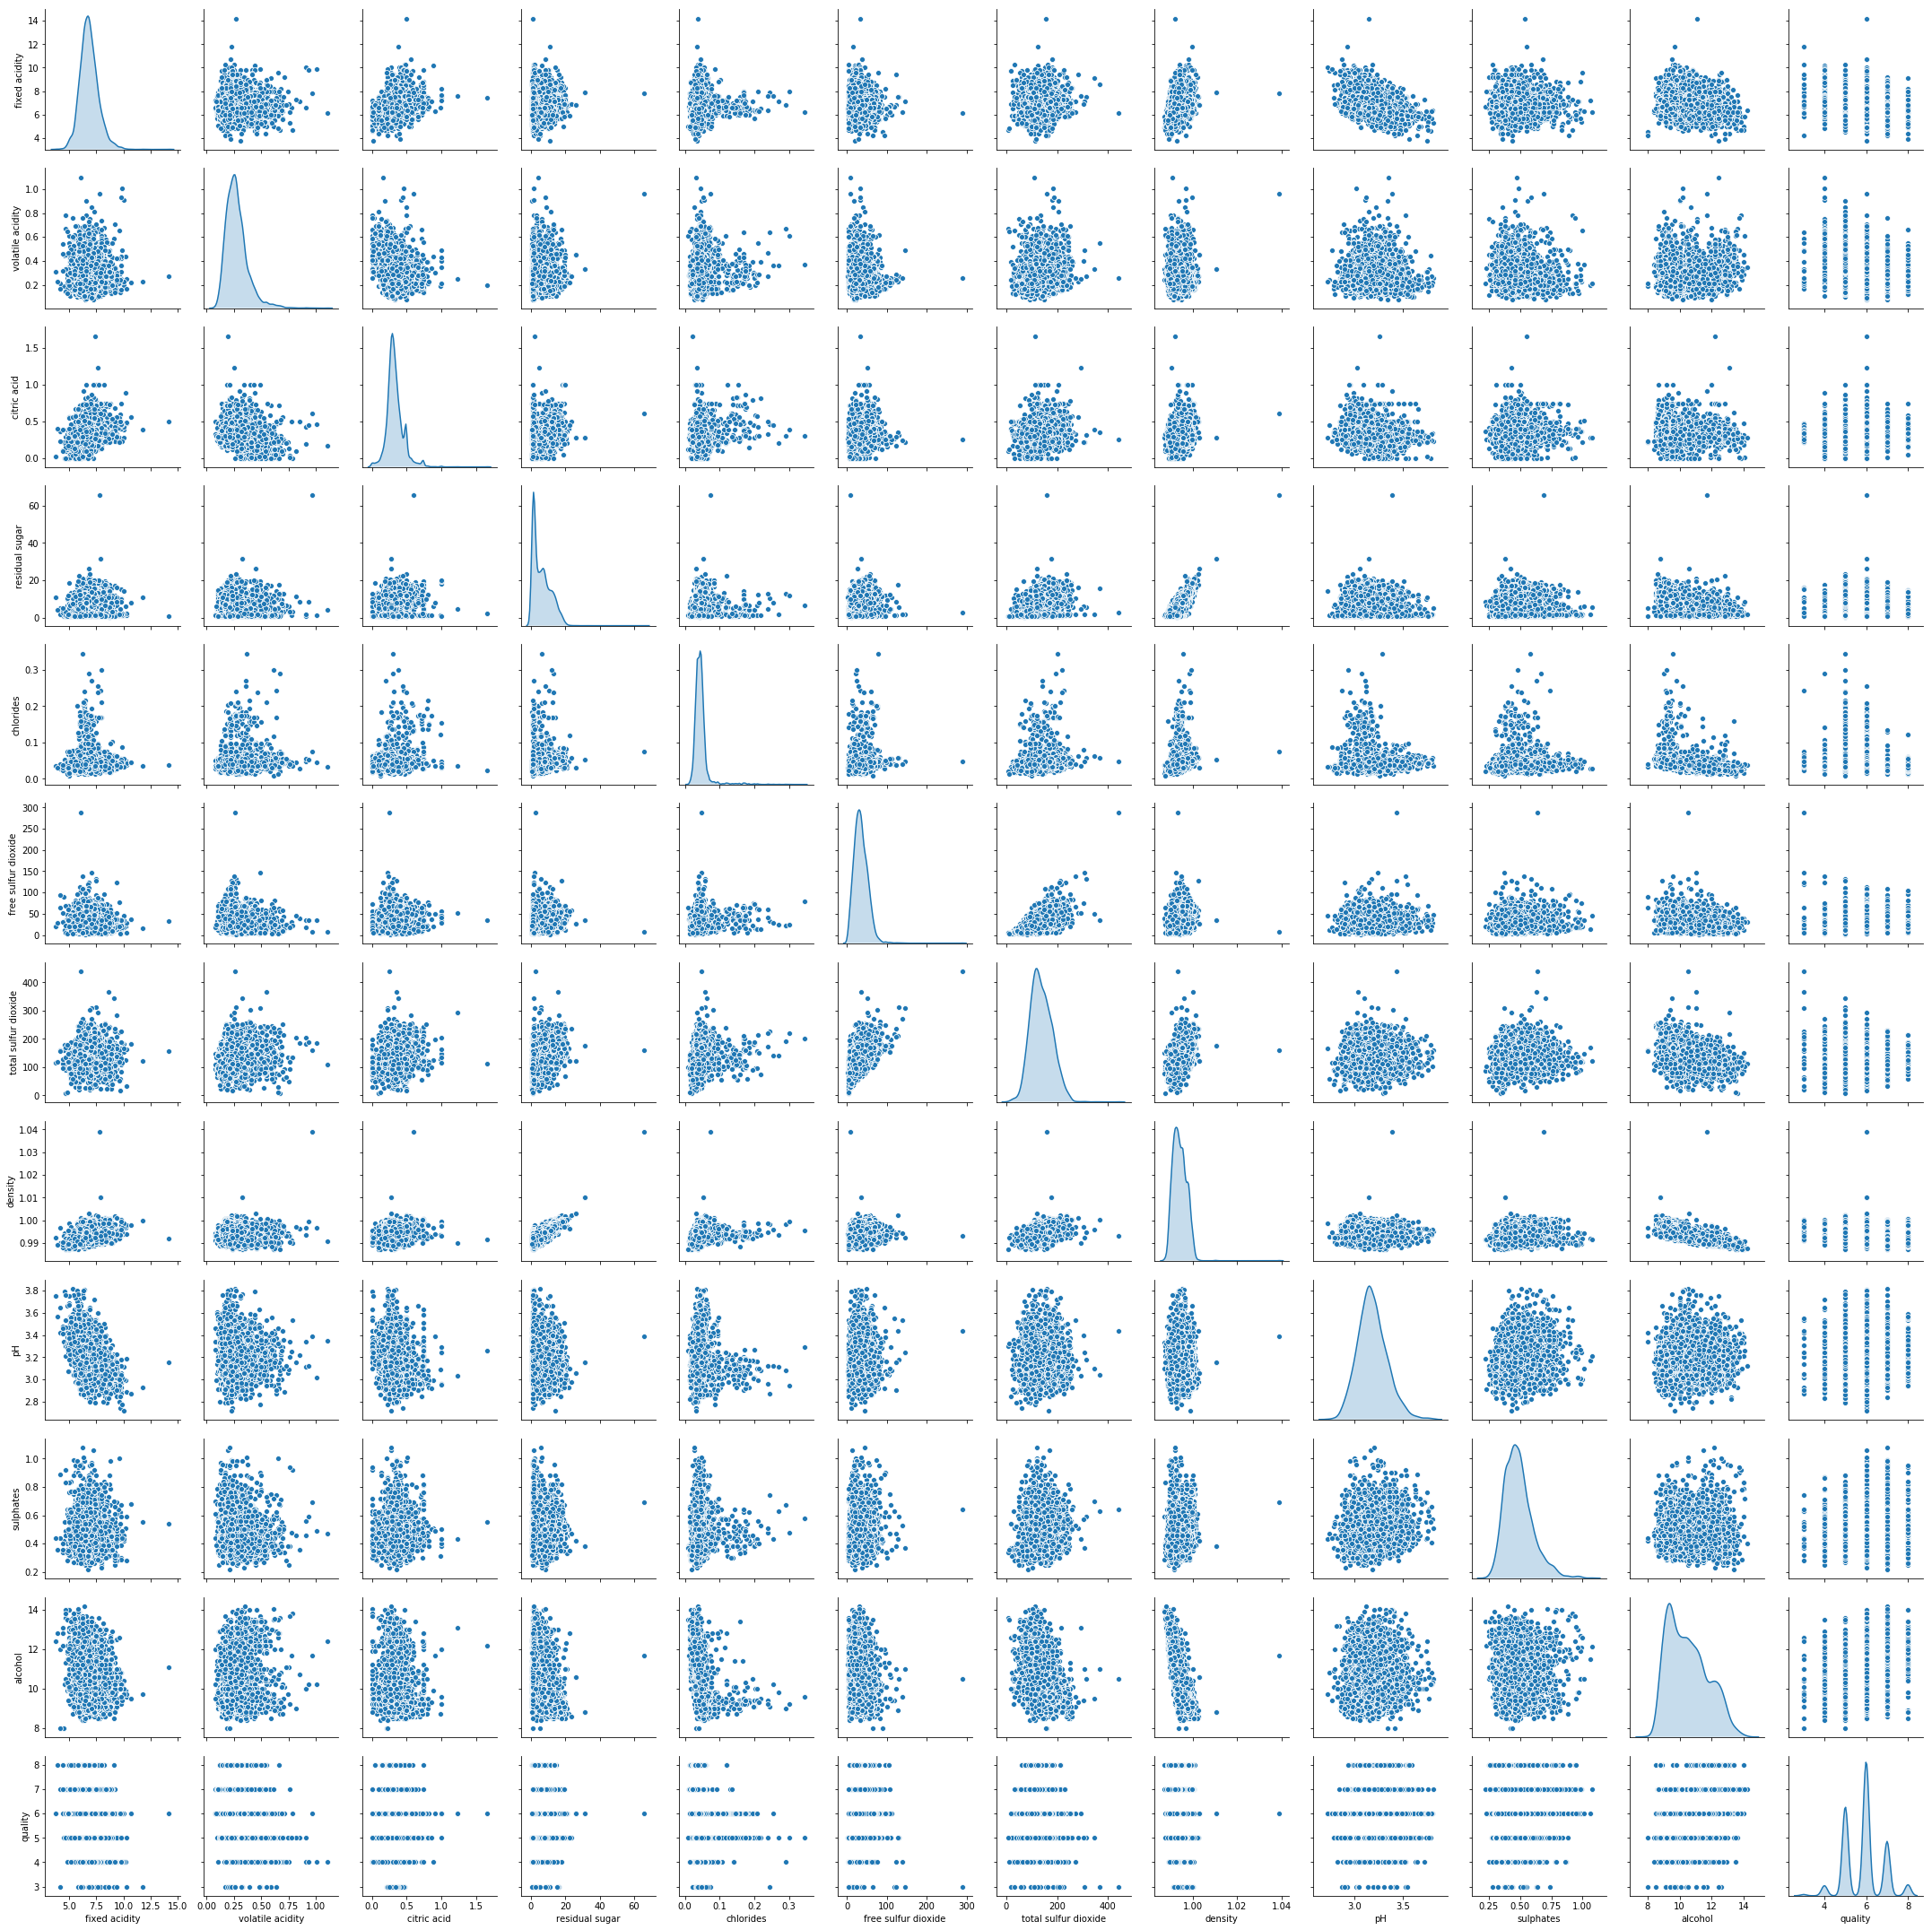

In [0]:
sns.pairplot(data=white, diag_kind = 'kde')

In [0]:
# Add `type` column to `red` with value 1
#red['type'] = 1

# Add `type` column to `white` with value 0
#white['type'] = 0

# Append `white` to `red`
#wines = red.append(white, ignore_index=True)
#wines.tail()

In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X_white =white.iloc[:,0:11]
X_red = red.iloc[:,0:11]

# Specify the target labels and flatten the array
y_white= np.ravel(white.quality)
y_red = np.ravel(red.quality)
#y= wines.type




encoder = OneHotEncoder()
y_white = encoder.fit_transform(y_white.reshape(-1,1))
y_red = encoder.fit_transform(y_red.reshape(-1,1))







# Split the data up in train and test sets
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.30, random_state=42)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.30, random_state=42)

In [5]:
print(y_red_train.shape)
print(y_red_test.shape)

print(y_white_train.shape)
print(y_white_test.shape)

(1119, 6)
(480, 6)
(3428, 6)
(1470, 6)


In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# scale training data
scaler = StandardScaler().fit(X_white_train)
X_white_train = scaler.transform(X_white_train)

scaler = StandardScaler().fit(X_red_train)
X_red_train = scaler.transform(X_red_train)

# Scale the test set
scaler = StandardScaler().fit(X_white_test)
X_white_test = scaler.transform(X_white_test)

scaler = StandardScaler().fit(X_red_test)
X_red_test = scaler.transform(X_red_test)




# Deep Neural Network

In [7]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense



# Initialize the constructor
model_white = Sequential()

# Add first hidden layer 
model_white.add(Dense(22, activation='relu', input_shape=(11,), name='fc1'))


Using TensorFlow backend.


In [0]:

# Add second hidden layer  hidden layer 
model_white.add(Dense(11,  name='fc2'))

# Add third hidden layer  hidden layer 
model_white.add(Dense(6,  name='fc3'))

# Add an output layer 
model_white.add(Dense(6, activation='sigmoid', name='output'))

In [9]:
model_white.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 22)                264       
_________________________________________________________________
fc2 (Dense)                  (None, 11)                253       
_________________________________________________________________
fc3 (Dense)                  (None, 6)                 72        
_________________________________________________________________
output (Dense)               (None, 6)                 42        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [10]:

model_white.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model_white.fit(X_white_train, y_white_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.2212 - accuracy: 0.4571
Epoch 2/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0958 - accuracy: 0.4994
Epoch 3/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0714 - accuracy: 0.5236
Epoch 4/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0570 - accuracy: 0.5254
Epoch 5/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0451 - accuracy: 0.5353
Epoch 6/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0364 - accuracy: 0.5461
Epoch 7/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0321 - accuracy: 0.5519
Epoch 8/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0228 - accuracy: 0.5455
Epoch 9/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.0149 - accuracy: 0.5505
Epoch 10/20
3428/3428 [==============================] - 5s 1ms/step - loss: 1.013

In [11]:
score = model_white.evaluate(X_white_test, y_white_test,verbose=1)

print(score)


1470/1470 [==============================] - 0s 43us/step
[1.0467398722966512, 0.5476190447807312]


In [0]:
import h5py

model_white.save('My Drive/model_white.h5')


# Using transfer learning, create DNN model for red wines which have similar features and quality labels

In [13]:
model_red = Sequential()

for layer in model_white.layers:
    model_red.add(layer)

model_red.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 22)                264       
_________________________________________________________________
fc2 (Dense)                  (None, 11)                253       
_________________________________________________________________
fc3 (Dense)                  (None, 6)                 72        
_________________________________________________________________
output (Dense)               (None, 6)                 42        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [0]:

model_red.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
#   history = model_red.fit(X_red_train, y_red_train,epochs=20, batch_size=1, verbose=1)   ----> we don't need to fit!!!

In [15]:
score = model_red.evaluate(X_red_test, y_red_test,verbose=1)

print(score)

480/480 [==============================] - 0s 92us/step
[0.4905538658301036, 0.8027778267860413]


In [0]:
# Notes on loss function  -

# Binary classification: two exclusive classes   ---- use binary cross entropy

# Multi-class classification: more than two exclusive classes   ---- use categorical cross entropy

# Multi-label classification: just non-exclusive classes   ---- use binary cross entropy


"""You can just consider the multi-label classifier as a multi separate binary classifier. 
If you have 10 classes here, you have 10 binary classifiers separately. 
Each binary classifier is trained independently. Thus, we can produce multi-label for each sample. 
If you want to make sure at least one label must be acquired, then you can select the one with the lowest classification 
loss function, or using other metrics."""

'You can just consider the multi-label classifier as a multi separate binary classifier. \nIf you have 10 classes here, you have 10 binary classifiers separately. \nEach binary classifier is trained independently. Thus, we can produce multi-label for each sample. \nIf you want to make sure at least one label must be acquired, then you can select the one with the lowest classification \nloss function, or using other metrics.'

# Make the first two layers non-trainable, fit the model for red and check accuracy scores

In [16]:
for layer in model_red.layers:
    if layer.name == 'fc1' or layer.name == 'fc2':
        layer.trainable = False


from termcolor import colored    #  python module for ANSII Color formatting for output in terminal

#Check which layers have been frozen 
for layer in model_red.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

fc1
False
fc2
False
fc3
True
output
True


In [17]:
model_red.fit(X_red_train, y_red_train , epochs = 20, verbose =1)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/20
1119/1119 [==============================] - 0s 157us/step - loss: 0.3951 - accuracy: 0.8354
Epoch 2/20
1119/1119 [==============================] - 0s 46us/step - loss: 0.3273 - accuracy: 0.8576
Epoch 3/20
1119/1119 [==============================] - 0s 46us/step - loss: 0.3098 - accuracy: 0.8579
Epoch 4/20
1119/1119 [==============================] - 0s 45us/step - loss: 0.3004 - accuracy: 0.8584
Epoch 5/20
1119/1119 [==============================] - 0s 46us/step - loss: 0.2946 - accuracy: 0.8597
Epoch 6/20
1119/1119 [==============================] - 0s 44us/step - loss: 0.2905 - accuracy: 0.8603
Epoch 7/20
1119/1119 [==============================] - 0s 46us/step - loss: 0.2870 - accuracy: 0.8628
Epoch 8/20
1119/1119 [==============================] - 0s 47us/step - loss: 0.2845 - accuracy: 0.8645
Epoch 9/20
1119/1119 [==============================] - 0s 45us/step - loss: 0.2824 - accuracy: 0.8636
Epoch 10/20
1119/1119 [==============================] - 0s 62us/step - 

In [18]:
score = model_red.evaluate(X_red_test, y_red_test,verbose=1)

print(score)

480/480 [==============================] - 0s 43us/step
[0.2761749804019928, 0.8579861521720886]
